In [56]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [88]:
import numpy as np
import matplotlib.pyplot as plt 

import matplotlib 

font = {'size'   : 19}

matplotlib.rc('font', **font)

# Numericko racunanje spektra linije u LTR

Pretpostavljamo da nam je zadato T i neko $\tau.$

Mi cemo onda pretpostaviti LTR, pa je funkcija izvora na zeljenoj talasnoj duzini: 

## $S = \frac{2hc^2}{\lambda^5}(e^{hc/\lambda kT)} -1)^{-1}$

a neprozracnost na nasim talasnim duzinama cemo parametrizovati kao: 

## $\tau_\lambda = \tau_c (1+\eta \phi_\lambda)$

gde je $\eta$ neka jacina linije (koliko linija apsorpbuje u odnosu na kontinuum, a $\phi_\lambda$ je apsorpcioni profil, koji cemo usloznjavati po potrebi.

In [127]:
def formalno_resenje(S, tau):
    
    ND = len(S)
    I = np.zeros(ND)
    
    # Krecemo od najdublje tacke
    I[ND-1] = S[ND-1] # Prakticno termodinamicka ravnoteza, radi dobro 
                      # ako je poslednja tacka na velikom tau
        
    for d in range(ND-2,-1,-1):
        
        S_srednje = (S[d+1] + S[d]) * 0.5
        delta = tau[d+1] - tau[d]
        
        if (delta < 0): delta = 0.0
        
        I[d] = I[d+1] * np.exp(-delta) + S_srednje * (1.0 - np.exp(-delta))
    
    return I

## Hajde da napravimo neku "vestacku" spektralnu liniju, sa zadatim $\eta$ i $\phi_\lambda$

In [90]:
eta = 100

# Pretpostavimo da je phi_lambda neka gausovska funkcija sa zadatom sirinom

delta_lambda_d = 5E-12 # 5 pm u m 
llambda0 = 630.15E-9 # u nm

llambda = np.linspace(630.1,630.2,501) * 1E-9

phi_lambda = 1./np.sqrt(np.pi) * np.exp(-(llambda - llambda0)**2.0/delta_lambda_d**2.0)

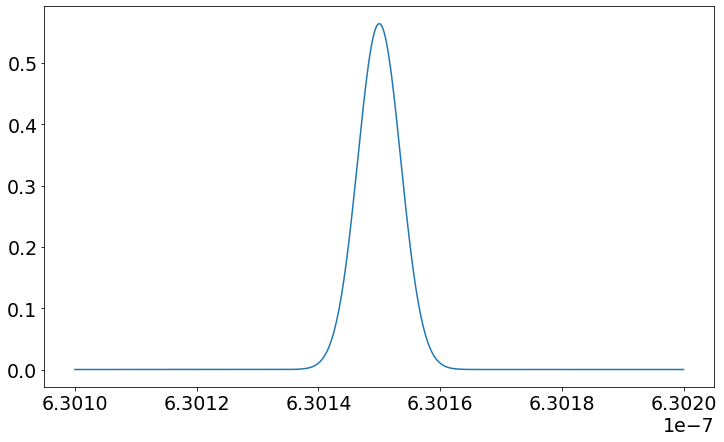

In [91]:
# Plotujemo profil da vidimo da li je sve ok 

plt.figure(figsize=[12,7])
plt.plot(llambda,phi_lambda)

### Uzmemo T i $\tau$ iz zadatog modela:

In [92]:
atmos = np.loadtxt("../Vezbe/falc_71.dat",skiprows=1,unpack=True)

In [93]:
atmos.shape

(12, 71)

In [94]:
tauc = 10.0**atmos[0]
T = atmos[2]

In [95]:
print(tauc)

[1.00000000e-06 1.25892541e-06 1.58489319e-06 1.99526231e-06
 2.51188643e-06 3.16227766e-06 3.98107171e-06 5.01187234e-06
 6.30957344e-06 7.94328235e-06 1.00000000e-05 1.25892541e-05
 1.58489319e-05 1.99526231e-05 2.51188643e-05 3.16227766e-05
 3.98107171e-05 5.01187234e-05 6.30957344e-05 7.94328235e-05
 1.00000000e-04 1.25892541e-04 1.58489319e-04 1.99526231e-04
 2.51188643e-04 3.16227766e-04 3.98107171e-04 5.01187234e-04
 6.30957344e-04 7.94328235e-04 1.00000000e-03 1.25892541e-03
 1.58489319e-03 1.99526231e-03 2.51188643e-03 3.16227766e-03
 3.98107171e-03 5.01187234e-03 6.30957344e-03 7.94328235e-03
 1.00000000e-02 1.25892541e-02 1.58489319e-02 1.99526231e-02
 2.51188643e-02 3.16227766e-02 3.98107171e-02 5.01187234e-02
 6.30957344e-02 7.94328235e-02 1.00000000e-01 1.25892541e-01
 1.58489319e-01 1.99526231e-01 2.51188643e-01 3.16227766e-01
 3.98107171e-01 5.01187234e-01 6.30957344e-01 7.94328235e-01
 1.00000000e+00 1.25892541e+00 1.58489319e+00 1.99526231e+00
 2.51188643e+00 3.162277

In [96]:
# Moramo da nadjemo funkciju izvora iz T

# S je prakticno konstantno sa lambda na datoj temperaturi, posto se 
# lambda JAKO MALO menja
h = 6.626E-34
k = 1.38E-23
c = 3E8

S = 2* h*c*c / llambda0**5.0 * 1./(np.exp(h*c/llambda0/k/T) -1)

Text(0, 0.5, 'S')

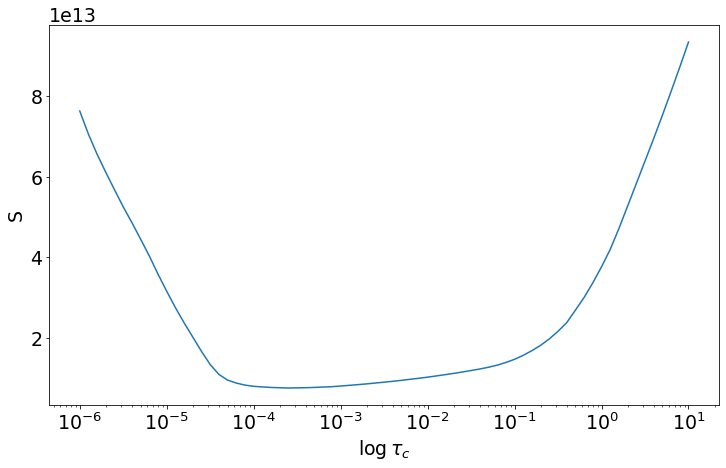

In [97]:
# Proverica

plt.figure(figsize=[12,7])
plt.semilogx(tauc,S)
plt.xlabel("$\log \\tau_c$")
plt.ylabel("S")

In [98]:
tau_lambda = tauc[:,None] * (1.0 + eta * phi_lambda[None,:])

In [99]:
print (tau_lambda[:,250])

[5.74189584e-05 7.22861858e-05 9.10029162e-05 1.14565884e-04
 1.44229902e-04 1.81574689e-04 2.28588990e-04 2.87776489e-04
 3.62289135e-04 4.56094998e-04 5.74189584e-04 7.22861858e-04
 9.10029162e-04 1.14565884e-03 1.44229902e-03 1.81574689e-03
 2.28588990e-03 2.87776489e-03 3.62289135e-03 4.56094998e-03
 5.74189584e-03 7.22861858e-03 9.10029162e-03 1.14565884e-02
 1.44229902e-02 1.81574689e-02 2.28588990e-02 2.87776489e-02
 3.62289135e-02 4.56094998e-02 5.74189584e-02 7.22861858e-02
 9.10029162e-02 1.14565884e-01 1.44229902e-01 1.81574689e-01
 2.28588990e-01 2.87776489e-01 3.62289135e-01 4.56094998e-01
 5.74189584e-01 7.22861858e-01 9.10029162e-01 1.14565884e+00
 1.44229902e+00 1.81574689e+00 2.28588990e+00 2.87776489e+00
 3.62289135e+00 4.56094998e+00 5.74189584e+00 7.22861858e+00
 9.10029162e+00 1.14565884e+01 1.44229902e+01 1.81574689e+01
 2.28588990e+01 2.87776489e+01 3.62289135e+01 4.56094998e+01
 5.74189584e+01 7.22861858e+01 9.10029162e+01 1.14565884e+02
 1.44229902e+02 1.815746

In [100]:
NL = len(phi_lambda)

In [101]:
spektar = np.zeros(NL)

In [102]:
# A sta sa pravcem?

mu = 1

In [103]:
for l in range(0,NL):
    
    I_temp = formalno_resenje(S,tau_lambda[:,l] / mu)
    
    spektar[l] = I_temp[0]

(0.0, 37081585671844.19)

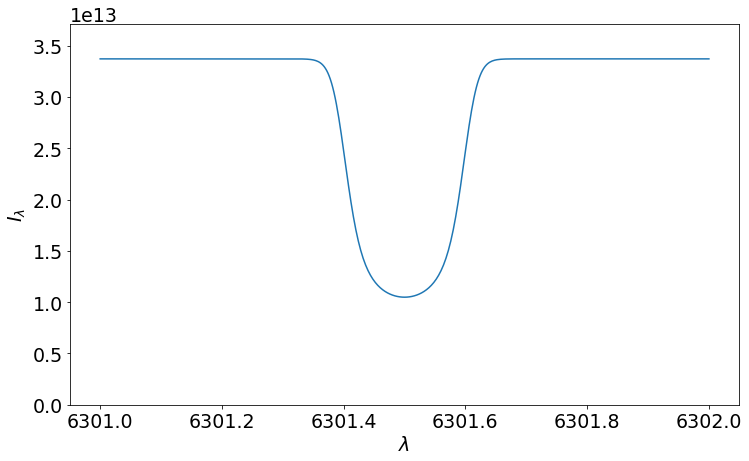

In [104]:
plt.figure(figsize=[12,7])
plt.plot(llambda*1e10,spektar)
plt.xlabel("$\\lambda$")
plt.ylabel("$I_\\lambda$")
plt.ylim([0,1.1*np.amax(spektar)])

In [106]:
def formalno_resenje_linija(S,tauc,eta,phi_lambda, mu):
    
    tau_lambda = tauc[:,None] * (1.0 + eta * phi_lambda[:,:])
    NL = len(phi_lambda[0,:])
    spektar = np.zeros(NL)
    
    for l in range(0,NL):
    
        I_temp = formalno_resenje(S,tau_lambda[:,l] / mu)
    
        spektar[l] = I_temp[0]
        
    return spektar    

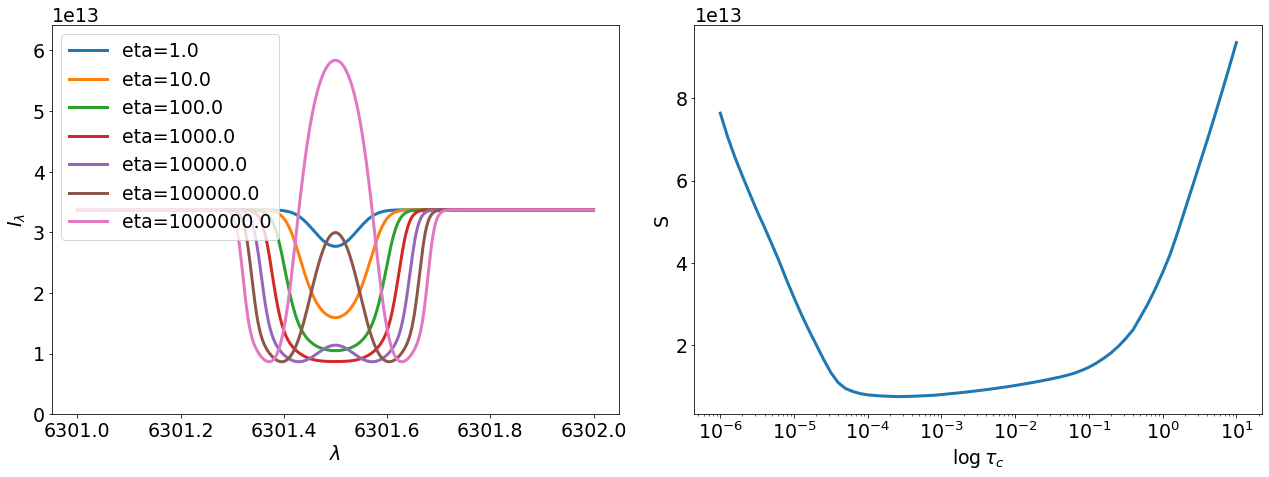

In [107]:
# Kako eta utice na oblik linije?

plt.figure(figsize=[18,7])

plt.subplot(121)

eta = 1.0

for i in range(0,7):
    
    # kloniraj phi_lambda:
    
    phi_lambda_temp = np.zeros([ND,NL])
    for d in range(0,ND):
        phi_lambda_temp[d] = phi_lambda
    
    spektar_temp = formalno_resenje_linija(S, tauc, eta, phi_lambda_temp, 1.0)
        
    plt.plot(llambda*1e10,spektar_temp,lw=3.0,label='eta='+str(eta))
    
    eta *= 10.0
    plt.xlabel("$\\lambda$")
    plt.ylabel("$I_\\lambda$")
    plt.ylim([0,1.1*np.amax(spektar_temp)])
    
plt.legend(loc = 'upper left')

plt.subplot(122)

plt.semilogx(tauc,S,lw=3)
plt.xlabel("$\log \\tau_c$")
plt.ylabel("S")
plt.tight_layout()

In [58]:
# U TR je nemoguce dobiti spektralne linije, kkako to da dokazemo. Napravimo izotermnu atmosferu! 

In [108]:
S_ltr = np.copy(S)
S_ltr[:] = S[61]

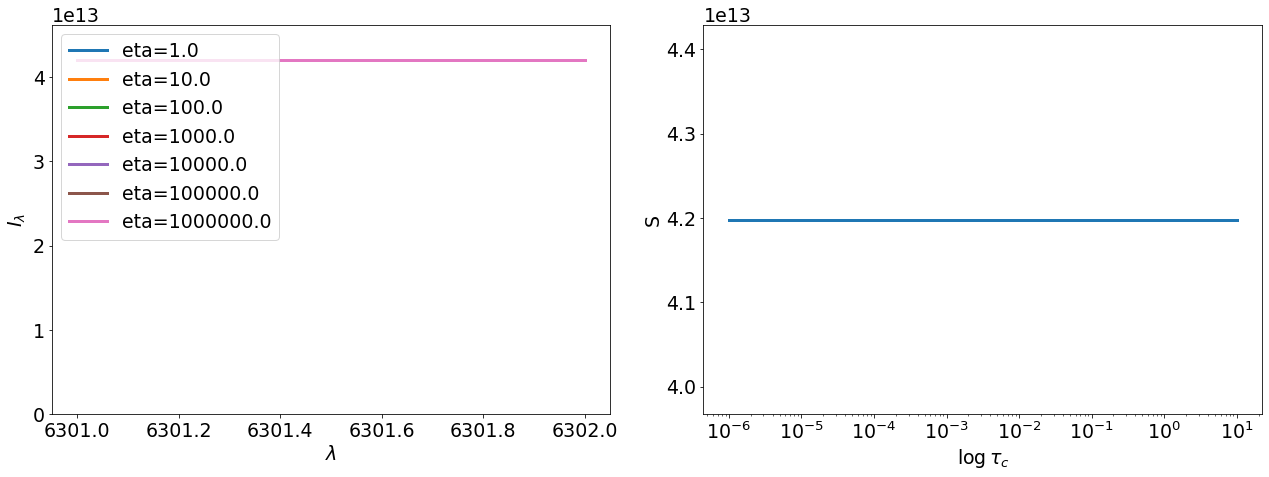

In [109]:
# Kako eta utice na oblik linije?

# Kako eta utice na oblik linije?

plt.figure(figsize=[18,7])

plt.subplot(121)

eta = 1.0

for i in range(0,7):
    
    # kloniraj phi_lambda:
    
    phi_lambda_temp = np.zeros([ND,NL])
    for d in range(0,ND):
        phi_lambda_temp[d] = phi_lambda
    
    spektar_temp = formalno_resenje_linija(S_ltr, tauc, eta, phi_lambda_temp, 1.0)
        
    plt.plot(llambda*1e10,spektar_temp,lw=3.0,label='eta='+str(eta))
    
    eta *= 10.0
    plt.xlabel("$\\lambda$")
    plt.ylabel("$I_\\lambda$")
    plt.ylim([0,1.1*np.amax(spektar_temp)])
    
plt.legend(loc = 'upper left')

plt.subplot(122)

plt.semilogx(tauc,S_ltr,lw=3)
plt.xlabel("$\log \\tau_c$")
plt.ylabel("S")
plt.tight_layout()

In [63]:
## Da odaberemo drugu talasnu duzinu. Npr u UV

In [110]:
delta_lambda_d = 2E-12 # 5 pm u m 
llambda0 = 200.0E-9 # u nm

llambda = np.linspace(199.95,200.05,501) * 1E-9

phi_lambda = 1./np.sqrt(np.pi) * np.exp(-(llambda - llambda0)**2.0/delta_lambda_d**2.0)

S = 2* h*c*c / llambda0**5.0 * 1./(np.exp(h*c/llambda0/k/T) -1)

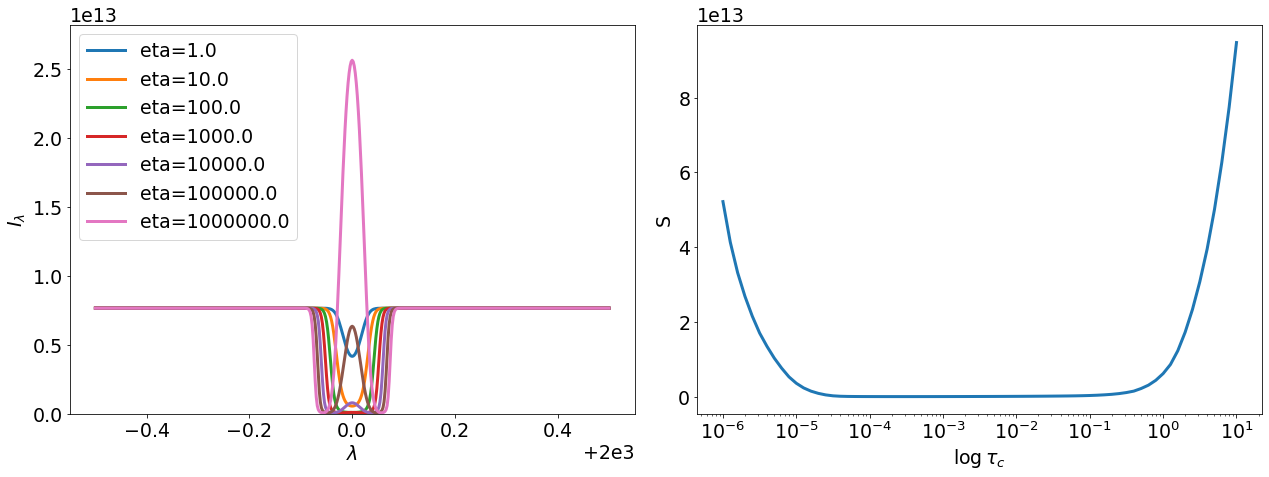

In [111]:
plt.figure(figsize=[18,7])

plt.subplot(121)

eta = 1.0

for i in range(0,7):
    
    # kloniraj phi_lambda:
    
    phi_lambda_temp = np.zeros([ND,NL])
    for d in range(0,ND):
        phi_lambda_temp[d] = phi_lambda
    
    spektar_temp = formalno_resenje_linija(S, tauc, eta, phi_lambda_temp, 1.0)
        
    plt.plot(llambda*1e10,spektar_temp,lw=3.0,label='eta='+str(eta))
    
    eta *= 10.0
    plt.xlabel("$\\lambda$")
    plt.ylabel("$I_\\lambda$")
    plt.ylim([0,1.1*np.amax(spektar_temp)])
    
plt.legend(loc = 'upper left')

plt.subplot(122)

plt.semilogx(tauc,S,lw=3)
plt.xlabel("$\log \\tau_c$")
plt.ylabel("S")
plt.tight_layout()

# Sledeci korak: Hocemo da vidimo kako polje brzina utice na oblik spektralne linije 

# znaci, svaki sloj, ima svoju brzinu i time nam pomera lambda_0

In [112]:
# Hajde prvo da zadamo brzinu:
ND = len(S)
v = np.zeros(ND)

In [160]:
v = np.linspace(-15.,15.,ND)*1E3

In [161]:
delta_lambda_d = 5E-12 # 5 pm u m 
llambda0 = 630.15E-9 # u nm

llambda = np.linspace(630.1,630.2,501) * 1E-9

S = 2* h*c*c / llambda0**5.0 * 1./(np.exp(h*c/llambda0/k/T) -1)

In [162]:
# Na svakoj dubini phi se menja. Tako da nas apsorpcioni profil treba da zavisi I OD DUBINE I OD TAL DUZINE

phi_lambda = np.zeros([ND,NL])

for d in range(0,ND):
    
    phi_lambda[d] = 1./np.sqrt(np.pi) * np.exp(-(llambda - llambda0 * (1.0 + v[d]/c))**2.0/delta_lambda_d**2.0)

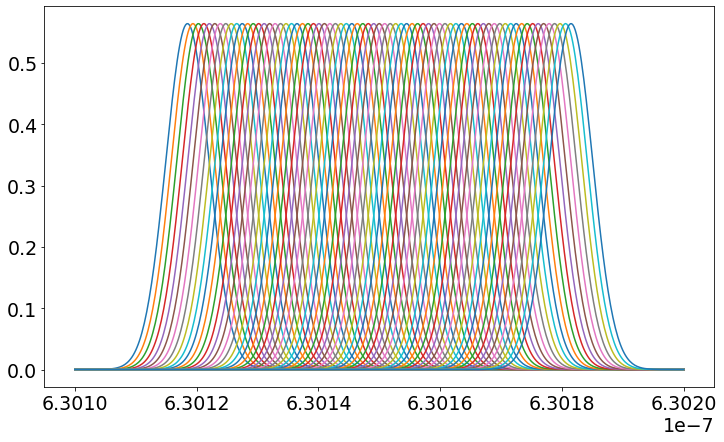

In [163]:
plt.figure(figsize=[12,7])
for d in range(0,ND):
    plt.plot(llambda,phi_lambda[d])

In [166]:
eta = 1E6
spektar = formalno_resenje_linija(S, tauc, eta, phi_lambda, 1.0)

(0.0, 65733018133093.5)

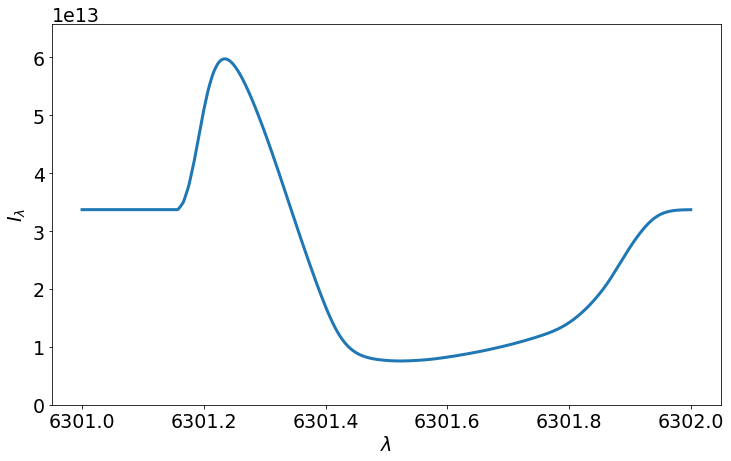

In [167]:
plt.figure(figsize=[12,7])
plt.plot(llambda*1e10,spektar, lw=3)
plt.xlabel("$\\lambda$")
plt.ylabel("$I_\\lambda$")
plt.ylim([0,1.1*np.amax(spektar)])

### Polja brzine u atmosferi rezultuju asimetricnim linijama!

### (Ili nekim bas suludim spektralnim linijama)

# Funkcija doprinosa (contribution function)

## Trazimo kvantitativan nacin da prikazemo koji deo linije (koja talasna duzina) se "formira" gde u atmosferi

## Upravo smo pokazali (na tabli), da funkcija doprinosa izgleda ovako:

## $\mathcal{C}(\tau_\lambda) = S(\tau_\lambda) e^{-\tau_\lambda} \tau_\lambda$

In [193]:
# Na svakoj dubini phi se menja. Tako da nas apsorpcioni profil treba da zavisi I OD DUBINE I OD TAL DUZINE

v = np.linspace(-10.,10.,ND)*1E3
phi_lambda = np.zeros([ND,NL])

for d in range(0,ND):
    
    phi_lambda[d] = 1./np.sqrt(np.pi) * np.exp(-(llambda - llambda0 * (1.0 + v[d]/c))**2.0/delta_lambda_d**2.0)
    
eta = 10000

In [194]:
tau_lambda = tauc[:,None] * (1.0 + eta * phi_lambda[:,:])

In [195]:
Cf = S[:,None] * np.exp(-tau_lambda) * tau_lambda

In [196]:
Cf.shape


(71, 501)

In [197]:
spektar = formalno_resenje_linija(S, tauc, eta, phi_lambda, 1.0)

In [198]:
Cf = Cf / spektar[None,:]

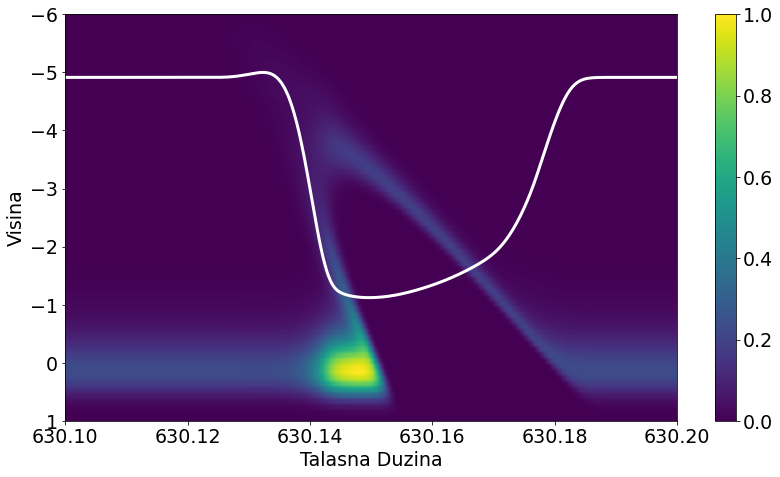

In [203]:
plt.figure(figsize=[12,7])
plt.imshow(Cf/np.amax(Cf),extent=[llambda[0]*1E9,llambda[-1]*1E9,np.log10(tauc[-1]),np.log10(tauc[0])],aspect='auto')
plt.plot(llambda*1E9,spektar/np.amax(spektar)*(-5),lw=3,color='white')
plt.xlabel("Talasna Duzina")
plt.ylabel("Visina")
plt.colorbar()
plt.tight_layout()

## Za kraj, jedan realisticniji profil linije

## Sta mozemo da uradimo? 

### eta ne diramo

### ali za phi mozemo da uzmemo fojtov profil, koji ima razlicitu doplerovu sirinu za razlicite dubine

In [205]:
# Razmatramo liniju gvodzdja

m = 56 * 1.6E-27 # kg 

vt = atmos[8] / 1E2
print (vt)

[6714.87  6555.13  6359.93  6135.67  5878.89  5563.87  5214.81  4808.82
 4326.48  3768.01  3206.03  2729.44  2321.09  2003.03  1711.14  1475.74
 1325.73  1198.73  1107.19  1026.97   966.709  919.674  875.83   837.441
  799.662  766.012  732.362  705.534  681.336  657.138  630.307  603.082
  575.858  553.404  543.812  534.22   524.628  532.643  547.303  561.963
  576.917  592.77   608.623  624.476  671.709  724.883  778.056  832.296
  887.552  950.84  1014.57  1077.32  1143.13  1208.94  1270.92  1334.63
 1398.55  1449.72  1500.42  1543.48  1584.16  1624.32  1651.94  1671.67
 1686.93  1700.73  1714.92  1726.5   1736.74  1745.13  1753.53 ]


In [206]:
delta_v_d = np.sqrt(2.*k*T/m + vt**2.0)
delta_lambda_d = llambda0 * delta_v_d / c

In [207]:
## Ovo je sada neki haxx da bismo mogli da koristimo Fojtovu funkciju

In [208]:
from scipy.special import wofz

# This is the original formulation of Voigt function, by using wofz
def V(x, alpha, gamma):
    
    #Return the Voigt line shape at x with Lorentzian component HWHM gamma
    #and Gaussian component HWHM alpha.

    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)



# This is a formulation where we "normalize" the wavelengths in order to get a dimensionless
# wavelength. It should work either way...

# center = lambda_0
# doppler = doppler widht
# damp = damping, in units of doppler broadening
# ll = wavelength array

def voigt(center,doppler,damp,ll):
    
    # we often call this reduced wavelength:
    doppler *= 1.17 # to convert to halfwidht half maximum
    xx = (ll - center)/doppler
    return V(xx,1.0,damp)

## Ovde je "damp" parameter koji se cesto obelezava sa $a$

## gde je:

## $ a = \frac{\Gamma_{damping}}{\Delta \nu_D} $
## $ \Delta \nu_D = \frac{\Delta v_D}{c} \lambda_0 $

In [230]:
phi_lambda = voigt(llambda0, delta_lambda_d[:,None], 0.1, llambda[None,:])
phi_lambda[:40] = voigt(llambda0, delta_lambda_d[:40,None], 0.005, llambda[None,:])

In [231]:
phi_lambda.shape

(71, 501)

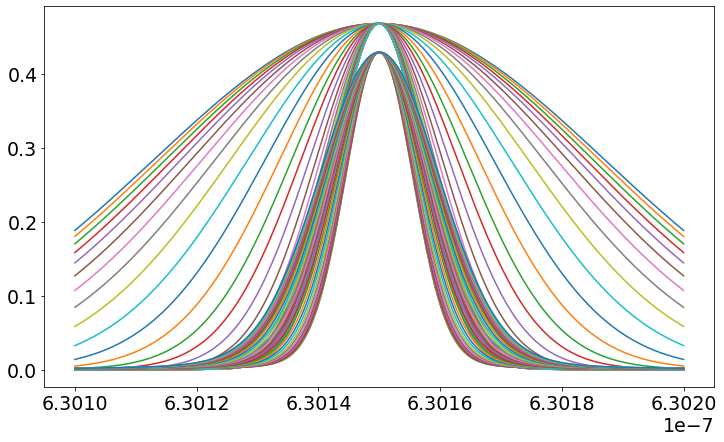

In [232]:
plt.figure(figsize=[12,7])
for d in range(0,ND):
    plt.plot(llambda,phi_lambda[d])

In [237]:
eta = 1000.0
spektar = formalno_resenje_linija(S, tauc, eta, phi_lambda, 1.0)

(0.0, 26528884371554.234)

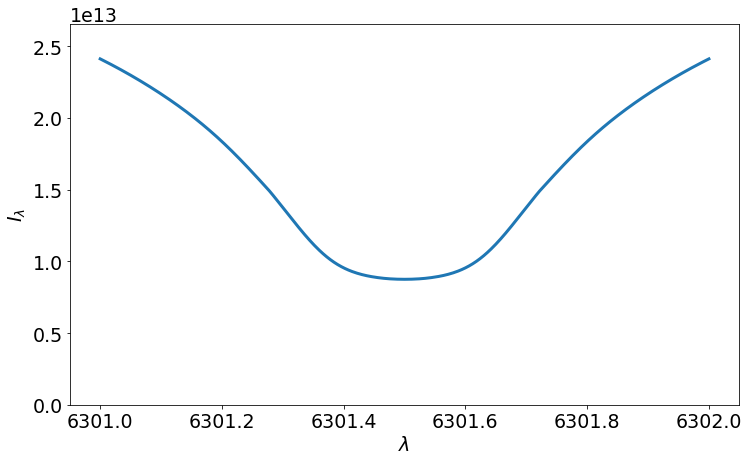

In [238]:
plt.figure(figsize=[12,7])
plt.plot(llambda*1e10,spektar, lw=3)
plt.xlabel("$\\lambda$")
plt.ylabel("$I_\\lambda$")
plt.ylim([0,1.1*np.amax(spektar)])